### 本节课主要是实际搭建和运用CNN网络中的各个层（卷积层、池化层和全连接层）。

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.initializers import Constant

In [4]:
print(tf.__version__)

2.11.0


### 生成6x8的全1矩阵，然后赋值为中间0，边缘为1的矩阵，这就类似一个黑白分明的图片。然后搭建一个卷积层，用其对刚才生成的矩阵处理，观察结果

In [5]:
xx = np.ones((6,8),dtype = np.float32)
xx

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [6]:
print(xx[1,2:5])
xx[:,2:6] = 0
xx

[1. 1. 1.]


array([[1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.]], dtype=float32)

In [7]:
input_shape = (1,6,8,1)
x = xx.reshape(input_shape)
mo = tf.keras.layers.Conv2D(1,(1,2))
y = mo(x)
print(y)
data = y.numpy()
print(data)

tf.Tensor(
[[[[1.5662059 ]
   [0.99143445]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5747714 ]
   [1.5662059 ]]

  [[1.5662059 ]
   [0.99143445]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5747714 ]
   [1.5662059 ]]

  [[1.5662059 ]
   [0.99143445]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5747714 ]
   [1.5662059 ]]

  [[1.5662059 ]
   [0.99143445]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5747714 ]
   [1.5662059 ]]

  [[1.5662059 ]
   [0.99143445]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5747714 ]
   [1.5662059 ]]

  [[1.5662059 ]
   [0.99143445]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5747714 ]
   [1.5662059 ]]]], shape=(1, 6, 7, 1), dtype=float32)
[[[[1.5662059 ]
   [0.99143445]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5747714 ]
   [1.5662059 ]]

  [[1.5662059 ]
   [0.99143445]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5747714 ]
   [1.5662059 ]]

  [[1.5662059 ]
   [0.99143445]
   [0.  

### 刚才学习的卷积，并没有指定卷积核，卷积核是随机的。那么如果我们想指定卷积核为固定值该怎么办呢？学习卷积核为固定值。

In [8]:
ini = tf.keras.initializers.Constant(3.)
val = ini(shape=(1,2))
val

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[3., 3.]], dtype=float32)>

In [9]:
ini = tf.keras.initializers.Constant([1.,-1.])
val = ini(shape=(1,2))
val

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 1., -1.]], dtype=float32)>

### 使用[1，-1]的卷积核，处理x矩阵。该卷积核可以提取图片的边缘信息。思考一下为什么？尝试一下查看效果

In [10]:
mo_ini = tf.keras.layers.Conv2D(1,(1,2),kernel_initializer = tf.initializers.Constant([1.,-1.]))
y = mo_ini(x)
print(y.numpy().reshape(6,7))

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


### 观察padding的作用

In [11]:
mo_ini = tf.keras.layers.Conv2D(1,(1,2),kernel_initializer = tf.keras.initializers.Constant([1.,-1.]),padding='same')
y = mo_ini(x)
print(y.numpy().reshape(6,8))

[[ 0.  1.  0.  0.  0. -1.  0.  1.]
 [ 0.  1.  0.  0.  0. -1.  0.  1.]
 [ 0.  1.  0.  0.  0. -1.  0.  1.]
 [ 0.  1.  0.  0.  0. -1.  0.  1.]
 [ 0.  1.  0.  0.  0. -1.  0.  1.]
 [ 0.  1.  0.  0.  0. -1.  0.  1.]]


In [12]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.initializers import Constant

### 观察strides的作用

In [13]:
mo_ini = Conv2D(1,(1,2),kernel_initializer = Constant([1.,-1.]),padding='same',strides = (2,3))
y = mo_ini(x)
print(y.numpy().reshape(3,3))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [14]:
mo_ini = Conv2D(1,(1,2),kernel_initializer = Constant([1.,-1.]),padding='same',strides = 2)
y = mo_ini(x)
print(y.numpy().reshape(3,4))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [15]:
mo_ini = Conv2D(2,(1,2))
y = mo_ini(x)
print(y)

tf.Tensor(
[[[[ 0.0868988  -0.02749014]
   [ 0.95691776  0.6341076 ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [-0.87001896 -0.6615977 ]
   [ 0.0868988  -0.02749014]]

  [[ 0.0868988  -0.02749014]
   [ 0.95691776  0.6341076 ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [-0.87001896 -0.6615977 ]
   [ 0.0868988  -0.02749014]]

  [[ 0.0868988  -0.02749014]
   [ 0.95691776  0.6341076 ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [-0.87001896 -0.6615977 ]
   [ 0.0868988  -0.02749014]]

  [[ 0.0868988  -0.02749014]
   [ 0.95691776  0.6341076 ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [-0.87001896 -0.6615977 ]
   [ 0.0868988  -0.02749014]]

  [[ 0.0868988  -0.02749014]
   [ 0.95691776  0.6341076 ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [-0.87001896 -0.66159

In [16]:
mo_ini = Conv2D(2,(1,2),padding='same',strides = 2)
y = mo_ini(x)
print(y)

tf.Tensor(
[[[[-1.624929  -0.6761508]
   [ 0.         0.       ]
   [ 0.         0.       ]
   [-1.624929  -0.6761508]]

  [[-1.624929  -0.6761508]
   [ 0.         0.       ]
   [ 0.         0.       ]
   [-1.624929  -0.6761508]]

  [[-1.624929  -0.6761508]
   [ 0.         0.       ]
   [ 0.         0.       ]
   [-1.624929  -0.6761508]]]], shape=(1, 3, 4, 2), dtype=float32)


## 彩色输入图片的2D卷积

(415, 420, 3)
(28, 28, 3)


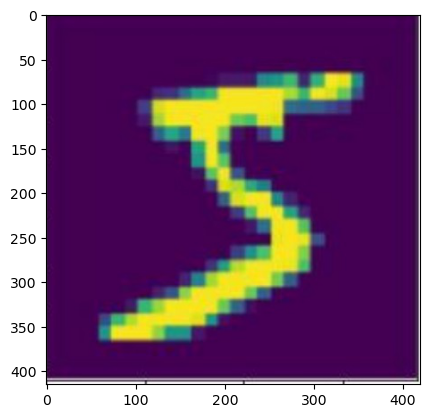

In [17]:
img = Image.open('te.jpg')
plt.imshow(img)
xx = np.array(img,dtype='float32')
print(xx.shape)
xx.resize((28,28,3))
print(xx.shape)

In [18]:
input_shape = (1,28,28,3)
x = xx.reshape(input_shape)
mo = Conv2D(1,(1,2))
y = mo(x)
print(y.numpy().shape)

(1, 28, 27, 1)


### 多通道输入也可以使用padding和strides调整得到不同特征图，可以尝试

### 批量输入（多个图片同时输入，比如我们在CNN模型中经常听到batchsize的设置。这个参数就是设置一次性送入模型训练的图片个数）

In [19]:
img1 = Image.open('te.jpg')
img2 = Image.open('te.jpg')
#数据处理，格式统一，大小统一
xx1 = np.array(img1,dtype='float32')
xx1.resize((1,28,28,3))
print(xx1.shape)
xx2 = np.array(img2,dtype='float32')
xx2.resize((1,28,28,3))
print(xx2.shape)

(1, 28, 28, 3)
(1, 28, 28, 3)


In [20]:
xxc = np.concatenate((xx1,xx2),axis = 0)
xxc.shape

(2, 28, 28, 3)

In [21]:
mo = Conv2D(1,(1,2))
y = mo(xxc)
print(y.numpy().shape)

(2, 28, 27, 1)
